In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [15]:
df = pd.read_csv('df_final.csv')

<h1>Dataset Checking

In [16]:
df.head()

,Name,Country,Price,Year,League,Country_Code,ID,Age,Height_cm,Weight_kg,Club,Joined,Position,Foot,IntReputation,Crossing,Finishing,Heading_accuracy,Short_passing,Volleys,Dribbling,Curve,FK_accuracy,Long_passing,Ball_control,Acceleration,Sprint_speed,Agility,Reactions,Balance,Shot_power,Jumping,Stamina,Strength,Long_shots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,Standing_tackle,Sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,D. Graham,England,5 to 15 million,2012-2013,Premier League,ENG,163340.0,24.0,185,88,Watford,"Jan 1, 2009",ST,Right,1.0,46.0,75.0,75.0,57.0,48.0,66.0,52.0,32.0,42.0,70.0,74.0,77.0,68.0,70.0,73.0,78.0,69.0,84.0,89.0,68.0,63.0,21.0,75.0,68.0,67.0,25.0,34.0,35.0,10.0,7.0,13.0,12.0,6.0
1,Y. Sylla,France,1 to 5 million,2012-2013,Premier League,FRA,201917.0,19.0,184,80,Clermont Foot 63,"Sep 2, 2010",CDM,Right,1.0,52.0,32.0,62.0,72.0,33.0,54.0,52.0,41.0,68.0,62.0,70.0,76.0,62.0,74.0,77.0,51.0,69.0,78.0,75.0,53.0,75.0,70.0,60.0,72.0,57.0,55.0,54.0,62.0,6.0,7.0,10.0,15.0,9.0
2,C. Samba,Congo,5 to 15 million,2012-2013,Premier League,CGO,46590.0,26.0,196,91,Blackburn Rovers,"Jan 1, 2007",CB,Right,2.0,31.0,57.0,86.0,49.0,56.0,38.0,22.0,20.0,51.0,55.0,61.0,69.0,39.0,69.0,68.0,69.0,86.0,70.0,90.0,26.0,88.0,75.0,55.0,56.0,38.0,75.0,78.0,75.0,13.0,10.0,6.0,8.0,7.0
3,B. Shea,USA,1 to 5 million,2012-2013,Premier League,USA,186536.0,20.0,191,86,FC Dallas,"Jan 1, 2008",LM,Left,1.0,57.0,60.0,64.0,66.0,61.0,70.0,72.0,58.0,69.0,68.0,68.0,79.0,76.0,68.0,78.0,75.0,79.0,69.0,76.0,58.0,83.0,46.0,69.0,61.0,55.0,53.0,54.0,55.0,15.0,6.0,12.0,11.0,8.0
4,L. Holtby,Germany,1 to 5 million,2012-2013,Premier League,GER,188154.0,19.0,176,72,1. FSV Mainz 05,"Sep 2, 2010",LW,Left,2.0,70.0,73.0,52.0,77.0,68.0,84.0,77.0,74.0,72.0,78.0,81.0,80.0,85.0,75.0,66.0,68.0,59.0,77.0,65.0,66.0,54.0,33.0,70.0,79.0,65.0,14.0,24.0,23.0,11.0,11.0,7.0,10.0,8.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              4213 non-null   object 
 1   Country           4213 non-null   object 
 2   Price             4213 non-null   object 
 3   Year              4213 non-null   object 
 4   League            4213 non-null   object 
 5   Country_Code      4213 non-null   object 
 6   ID                4213 non-null   float64
 7   Age               4213 non-null   float64
 8   Height_cm         4213 non-null   int64  
 9   Weight_kg         4213 non-null   int64  
 10  Club              4213 non-null   object 
 11  Joined            4213 non-null   object 
 12  Position          4213 non-null   object 
 13  Foot              4213 non-null   object 
 14  IntReputation     4213 non-null   float64
 15  Crossing          4213 non-null   float64
 16  Finishing         4213 non-null   float64


In [18]:
df.isnull().sum().sum()

0

<h1>Exploraratory Data Analysis

This dataset will be used to train a model for transfer modelling. The target column will be the league to which players will be transfered to. That is why the EDA will be focused on finding out the differences between players who got transfered to various leagues.

Firstly, it is important to analyze the balance of target column. For this, the bar plot of value counts will be a good choice.

Result: It is not ideally balanced, but the distribution seems OK for modelling.

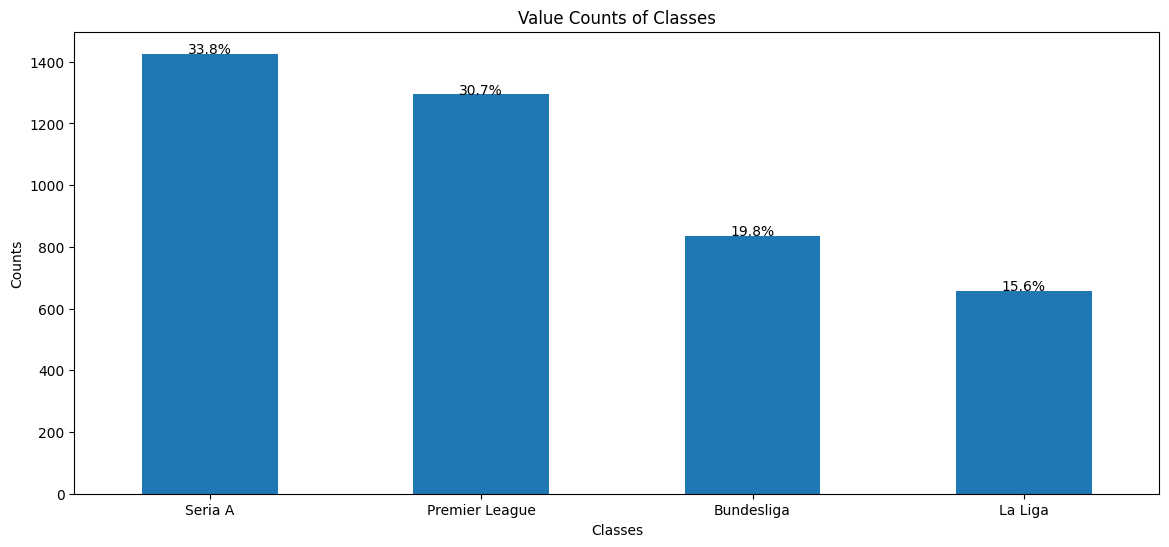

In [19]:
value_counts = df['League'].value_counts()
percentages = (value_counts / len(df)) * 100

plt.figure(figsize=(14, 6))
ax = value_counts.plot(kind='bar')
plt.title('Value Counts of Classes')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i, v in enumerate(value_counts):
    ax.text(i, v + 0.5, f"{percentages[i]:.1f}%", ha='center')

Analyze the nationality of players to see if it can be a feature for the model.

Result: It seems that there are a lot of countries and obviously, it cannot feed in the model like this. There are two ways that can be tried:

1. Group countries into continents.
2. Group less frequent countries as the class 'Others'.

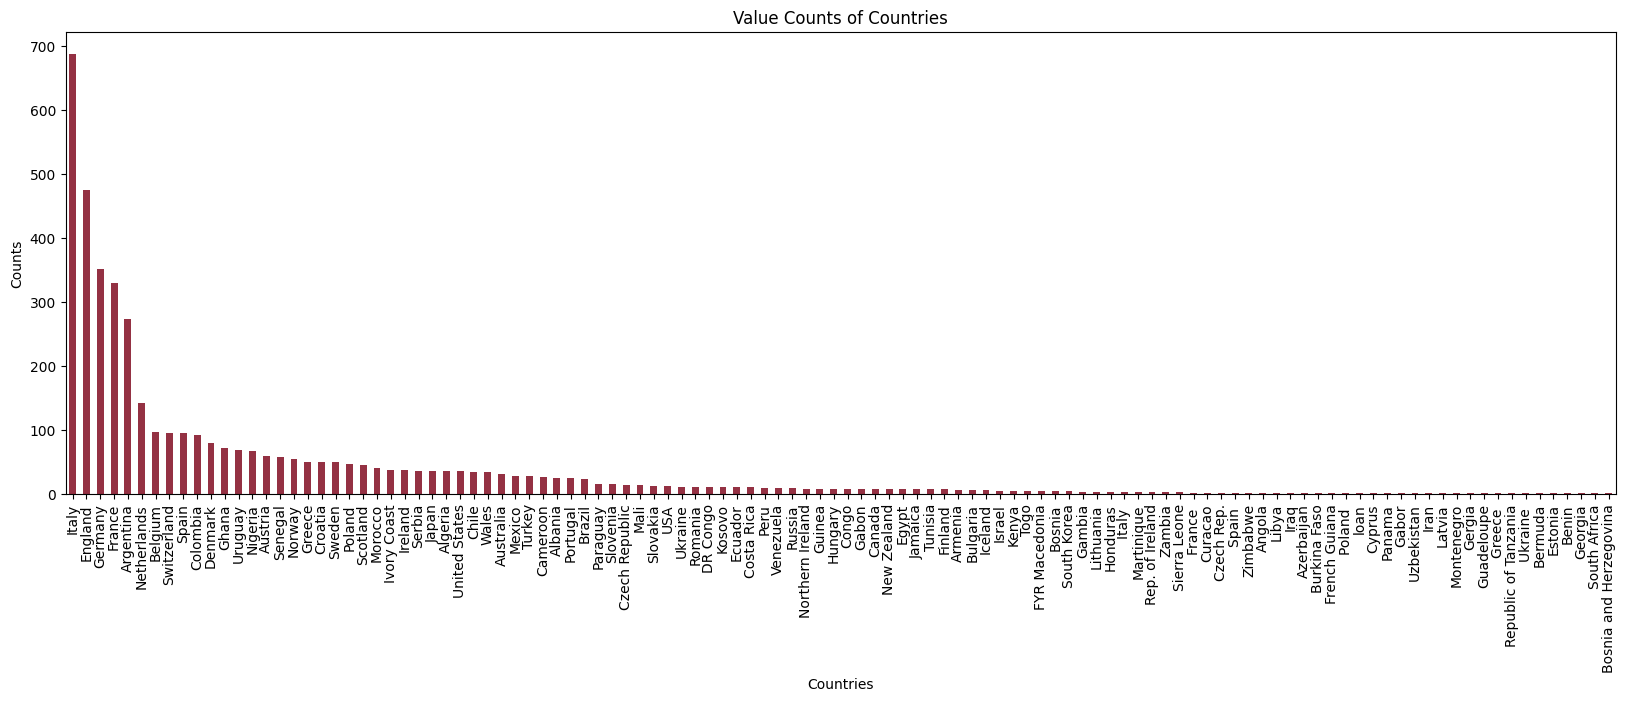

In [26]:
value_counts = df['Country'].value_counts()
percentages = (value_counts / len(df)) * 100

plt.figure(figsize=(20, 6))
ax = value_counts.plot(kind='bar', color = '#943143')
plt.title('Value Counts of Countries')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

Plotting the Price column by the hue of League and Year to find out if there is any correlation.

Result: Premier League and Bundesliga have made more expensive transfer than the other two leagues.

In [ ]:
df['Price'] = pd.Categorical(df['Price'], ['Undisclosed','Free','Loan','<1 million','1 to 5 million', '5 to 15 million', '15 to 25 million',
       '25 to 40 million', '40 to 70 million', '>70 million'])

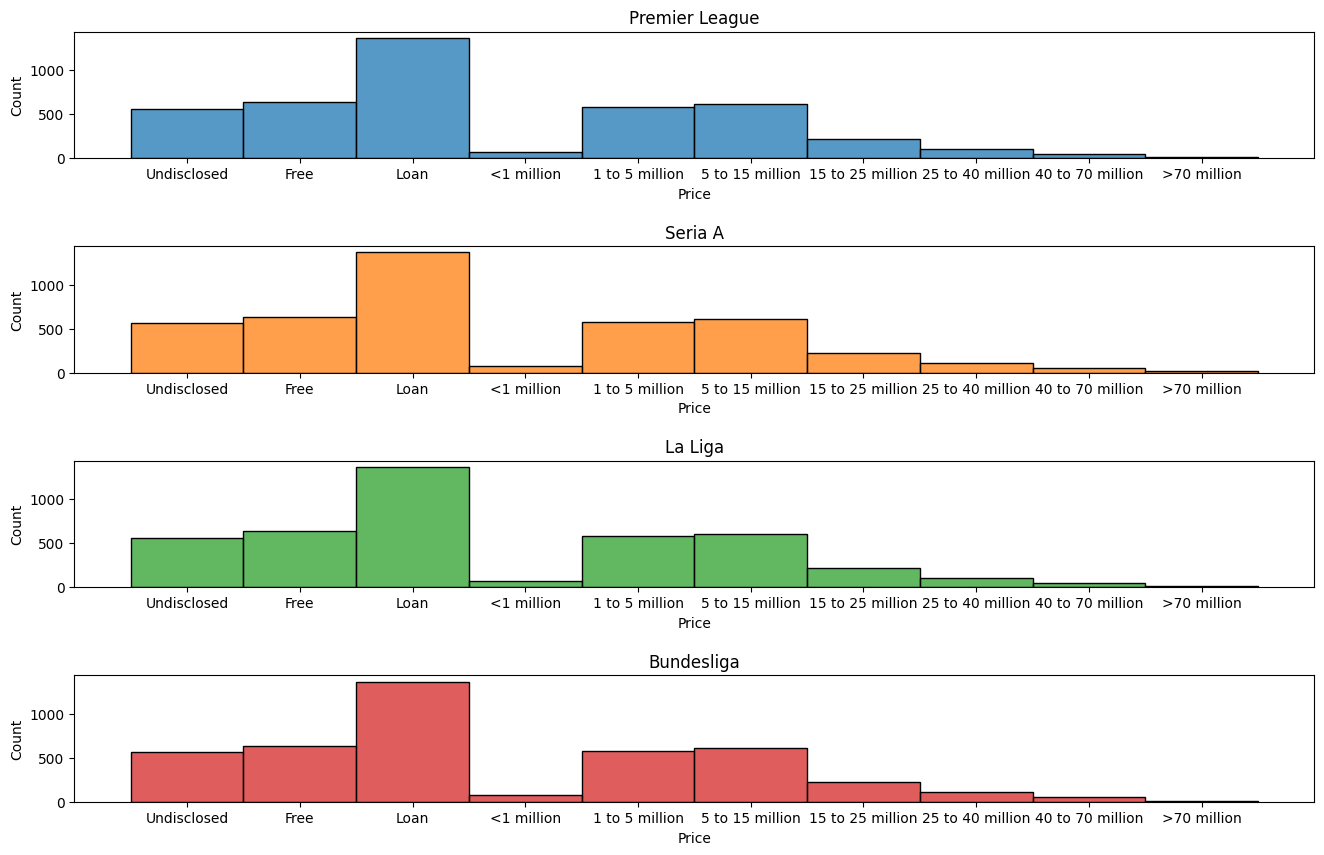

In [63]:
plt.figure(figsize=(16, 10))

plt.subplots_adjust(hspace=0.7)

leagues = ['Premier League', 'Seria A', 'La Liga', 'Bundesliga']

for i, league in enumerate(leagues, start=1):
    plt.subplot(4, 1, i)
    data = df[df['League'] == league]
    sns.histplot(data=df, x='Price', bins=10, color='C{}'.format(i-1))
    plt.title(league)
    plt.xlabel('Price')
    plt.ylabel('Count')

plt.show()

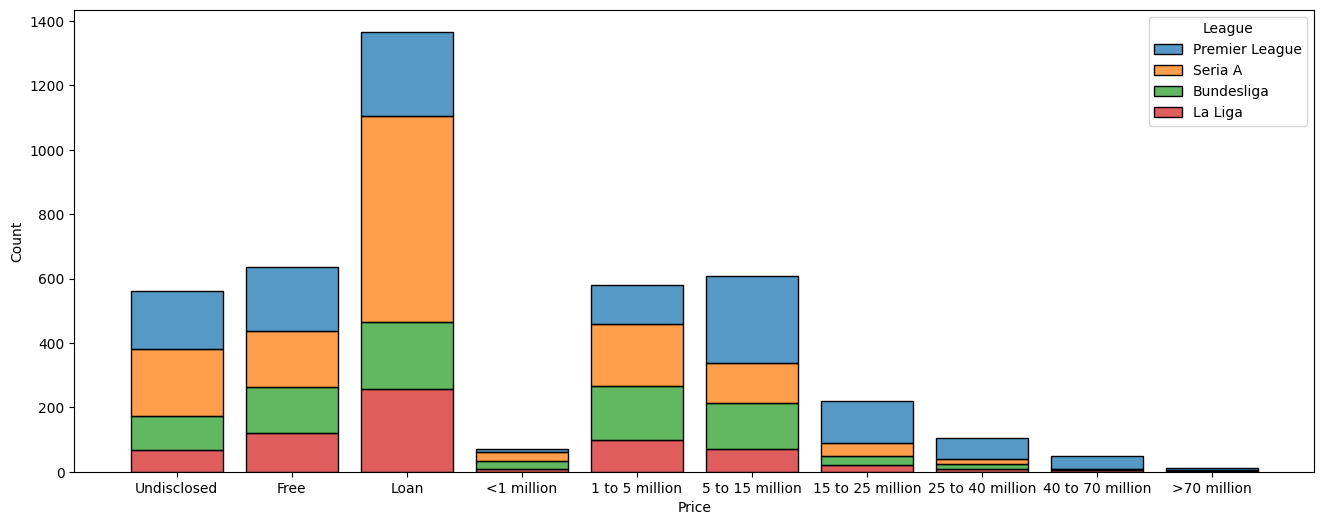

In [86]:
plt.figure(figsize=(16, 6))

sns.histplot(data = df, x = 'Price', hue = 'League', multiple="stack", bins = 25, shrink=.8)
plt.show()

Plotting Histogram of Age to see differences for Leagues

Result: As the age goes above 25, the proportion of Premier League decreases in the favor of Seris A.

<Axes: xlabel='Age', ylabel='Count'>

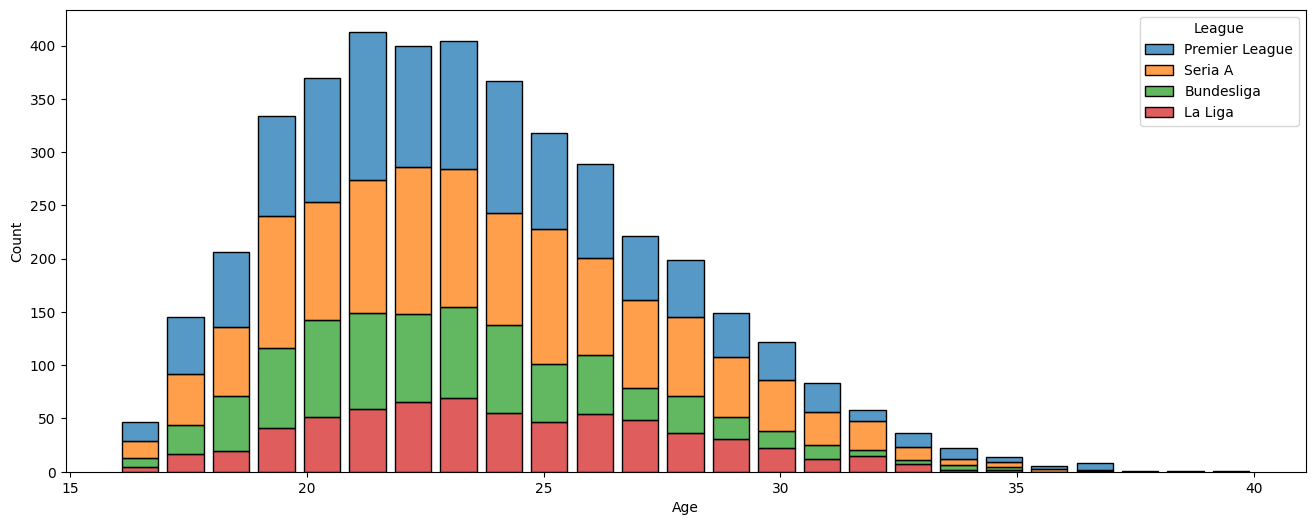

In [77]:
plt.figure(figsize=(16, 6))

sns.histplot(data = df, x = 'Age', hue = 'League', multiple="stack", bins = 25, shrink=.8)
plt.show()

No direct correlation between position and league.

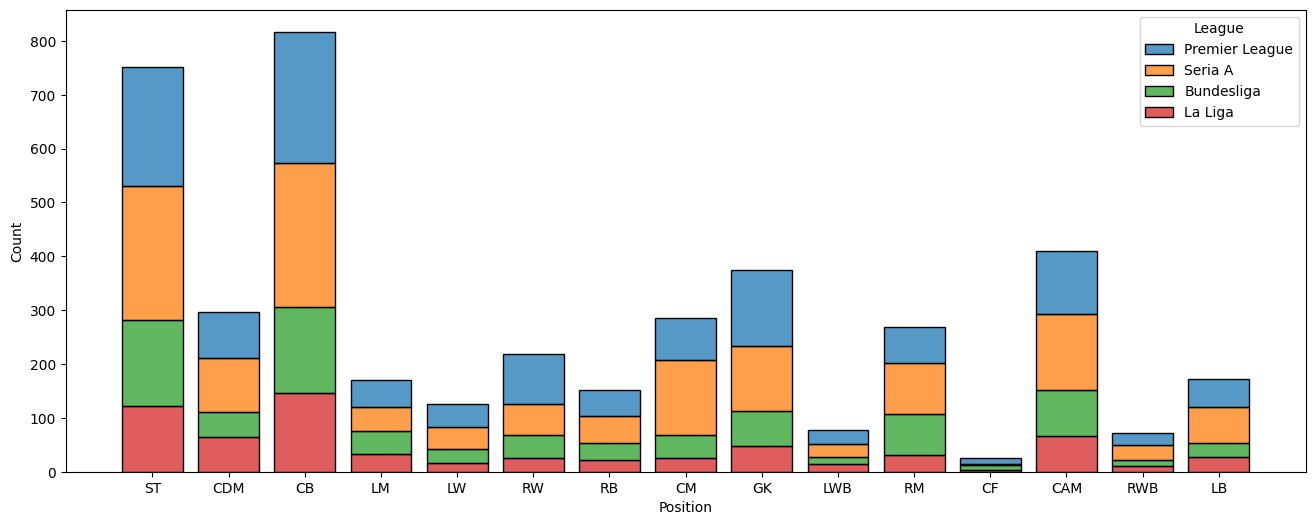

In [89]:
plt.figure(figsize=(16, 6))

sns.histplot(data = df, x = 'Position', hue = 'League', multiple="stack", bins = 25, shrink=.8)
plt.show()